<center><b>In the name of God</b></center>

<b>Course</b>: Machine Learning
<br>
<b>Description:</b> HomeWork 3 | Question 1
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

# Libraries

In [1]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Load Dataset

In [2]:
data = pd.read_csv("iris.data", header=None, names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "class"])

In [3]:
data_sepal = data[["Sepal Length", "Sepal Width", "class"]]
data_petal = data[["Petal Length", "Petal Width", "class"]]

## Plot Dataset

In [4]:
class_names = list(set(data["class"].values))
class_colors = ["red", "green", "blue"]

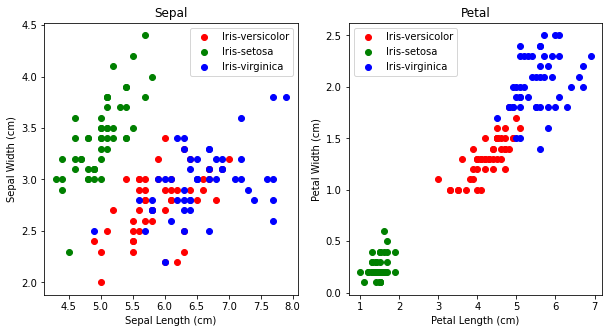

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2)

# Sepal
class_data = []
for class_name in class_names:
    class_data.append(data_sepal[data_sepal["class"]==class_name])    
    
for i in range(len(class_names)):
    axs[0].scatter(class_data[i]["Sepal Length"].values, class_data[i]["Sepal Width"].values,
                color=class_colors[i], label=class_names[i])


axs[0].title.set_text("Sepal")    
axs[0].legend()
plt.setp(axs[0], xlabel='Sepal Length (cm)')
plt.setp(axs[0], ylabel='Sepal Width (cm)')    

# Petal
class_data = []
for class_name in class_names:
    class_data.append(data_petal[data_petal["class"]==class_name])    
    
for i in range(len(class_names)):
    axs[1].scatter(class_data[i]["Petal Length"].values, class_data[i]["Petal Width"].values,
                color=class_colors[i], label=class_names[i])

axs[1].title.set_text("Petal")    
axs[1].legend()
plt.setp(axs[1], xlabel='Petal Length (cm)')
plt.setp(axs[1], ylabel='Petal Width (cm)')    

# Plot all!
fig.set_size_inches(10,5)
plt.show()

# Train and Test Split

In [6]:
CREATE_TRAIN_TEST_REQUIRED = False

if CREATE_TRAIN_TEST_REQUIRED:
    # One time shuffling
    data = data.sample(frac=1)
    
    # 70% for train, 30% for test
    data_train = data.head(int(150*0.7))
    data_test = data.tail(int(150*0.3))
    
    data_train.to_csv("./train_data.csv")
    data_test.to_csv("./test_data.csv")
else:
    data_train = pd.read_csv("./train_data.csv").drop(columns=["Unnamed: 0"])
    data_test = pd.read_csv("./test_data.csv").drop(columns=["Unnamed: 0"])

In [7]:
data_train_sepal = data_train[["Sepal Length", "Sepal Width", "class"]]
data_train_petal = data_train[["Petal Length", "Petal Width", "class"]]

data_test_sepal = data_test[["Sepal Length", "Sepal Width", "class"]]
data_test_petal = data_test[["Petal Length", "Petal Width", "class"]]

# Linear Kernel

c:\users\alirezamazochi\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\alirezamazochi\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\alirezamazochi\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\alirezamazochi\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


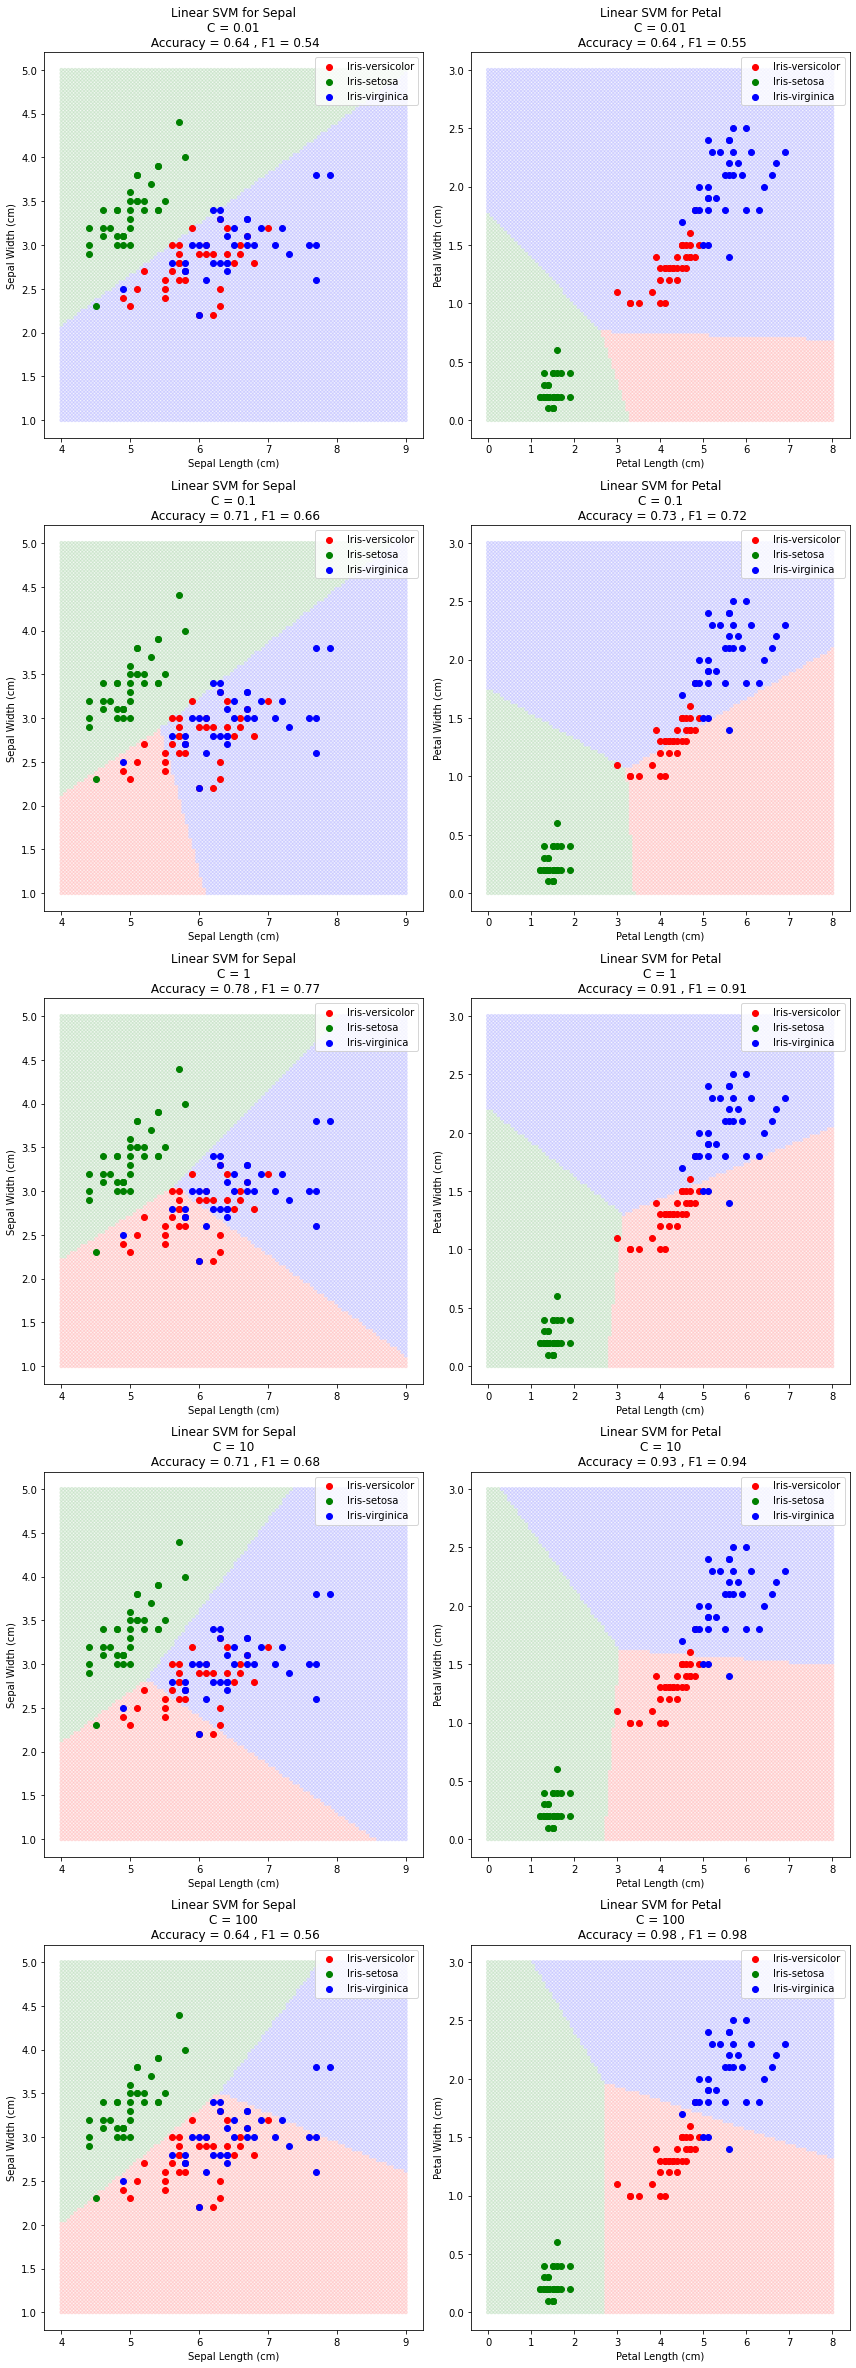

In [8]:
fig, axs = plt.subplots(5,2)

for feature_group_id, feature_group in enumerate(["Sepal", "Petal"]):
    for c_id, c in enumerate([0.01, 0.1, 1, 10, 100]):
        
        linear_svm = LinearSVC(C=c)    

        if feature_group == "Sepal":
            data_train_selected = data_train_sepal
            data_test_selected = data_test_sepal
            x_minim = 4
            x_maxim = 9
            y_minim = 1
            y_maxim = 5

        else:
            data_train_selected = data_train_petal
            data_test_selected = data_test_petal
            x_minim = 0
            x_maxim = 8
            y_minim = 0
            y_maxim = 3

        linear_svm.fit(data_train_selected.drop(columns=["class"]), data_train_selected["class"])
        
        # Plot Decision Boundry
        x_list = []
        y_list = []
        c_list = []
        xy_list = []
        
        for x in np.linspace(x_minim, x_maxim, 100):
            for y in np.linspace(y_minim, y_maxim, 100):
                xy_list.append([x, y])
                x_list.append(x)
                y_list.append(y)

        for predict in linear_svm.predict(xy_list):
            if predict=="Iris-setosa":
                c_list.append("green")
            elif predict=="Iris-versicolor":
                c_list.append("red")
            elif predict=="Iris-virginica":
                c_list.append("blue")

        axs[c_id, feature_group_id].scatter(x_list, y_list, color=c_list, alpha=0.1, s=10)
        
        # Plot Data
        class_data = []
        for class_name in class_names:
            class_data.append(data_train_selected[data_train_selected["class"]==class_name])    

        for i in range(len(class_names)):
            axs[c_id, feature_group_id].scatter(class_data[i][f"{feature_group} Length"].values
                                                ,class_data[i][f"{feature_group} Width"].values
                                                ,color=class_colors[i], label=class_names[i])
        
        # Evaluation metrics
        y_true = data_test_selected["class"].values
        y_pred = linear_svm.predict(data_test_selected.drop(columns = ["class"]))    
        
        accuracy = round(accuracy_score(y_true, y_pred), 2)
        f1 = round(f1_score(y_true, y_pred, average='macro'), 2)

        # Add titles and labels
        axs[c_id, feature_group_id].title.set_text(f"Linear SVM for {feature_group}\nC = {c}\n Accuracy = {accuracy} , F1 = {f1}")    
        axs[c_id, feature_group_id].legend()
        plt.setp(axs[c_id, feature_group_id], xlabel=f"{feature_group} Length (cm)", ylabel=f"{feature_group} Width (cm)")

# Plot all!
fig.set_size_inches(12,33)
fig.tight_layout()
plt.show()

# Polynomial Kernel

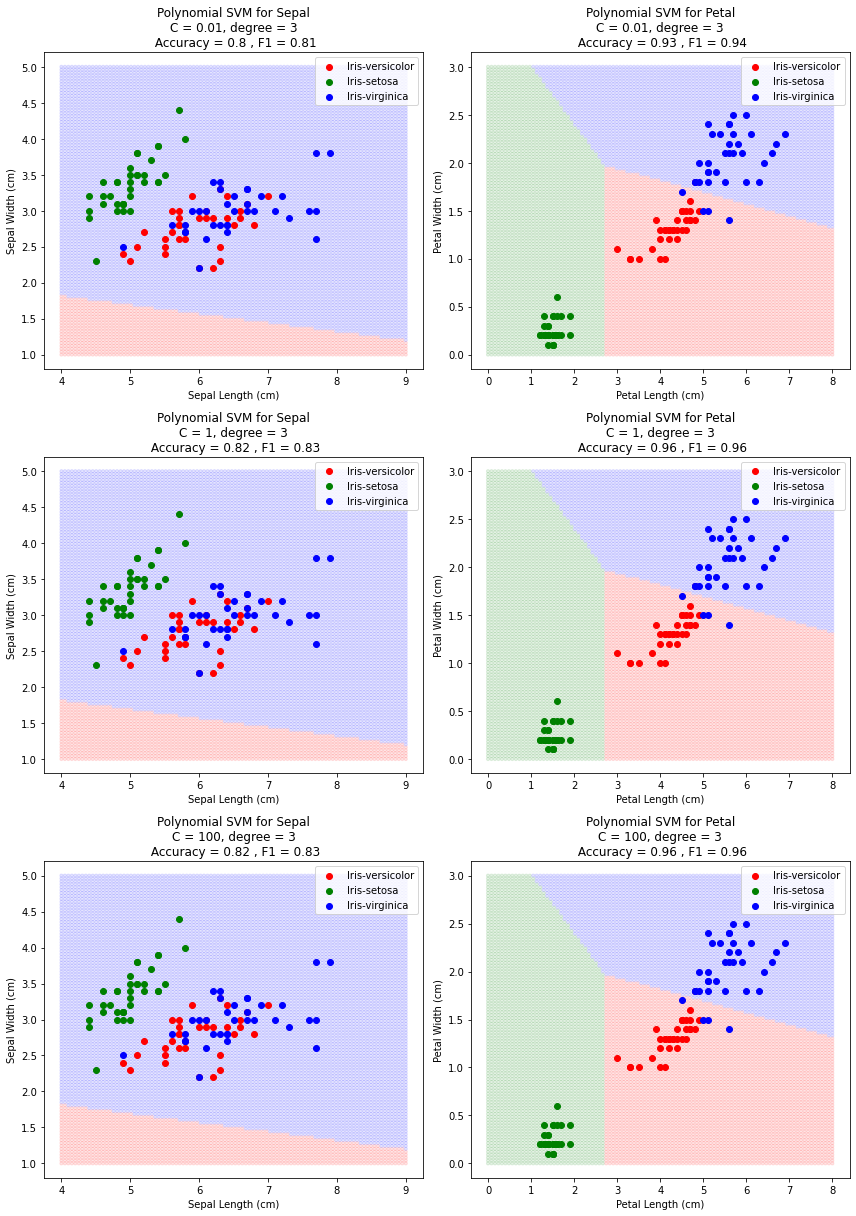

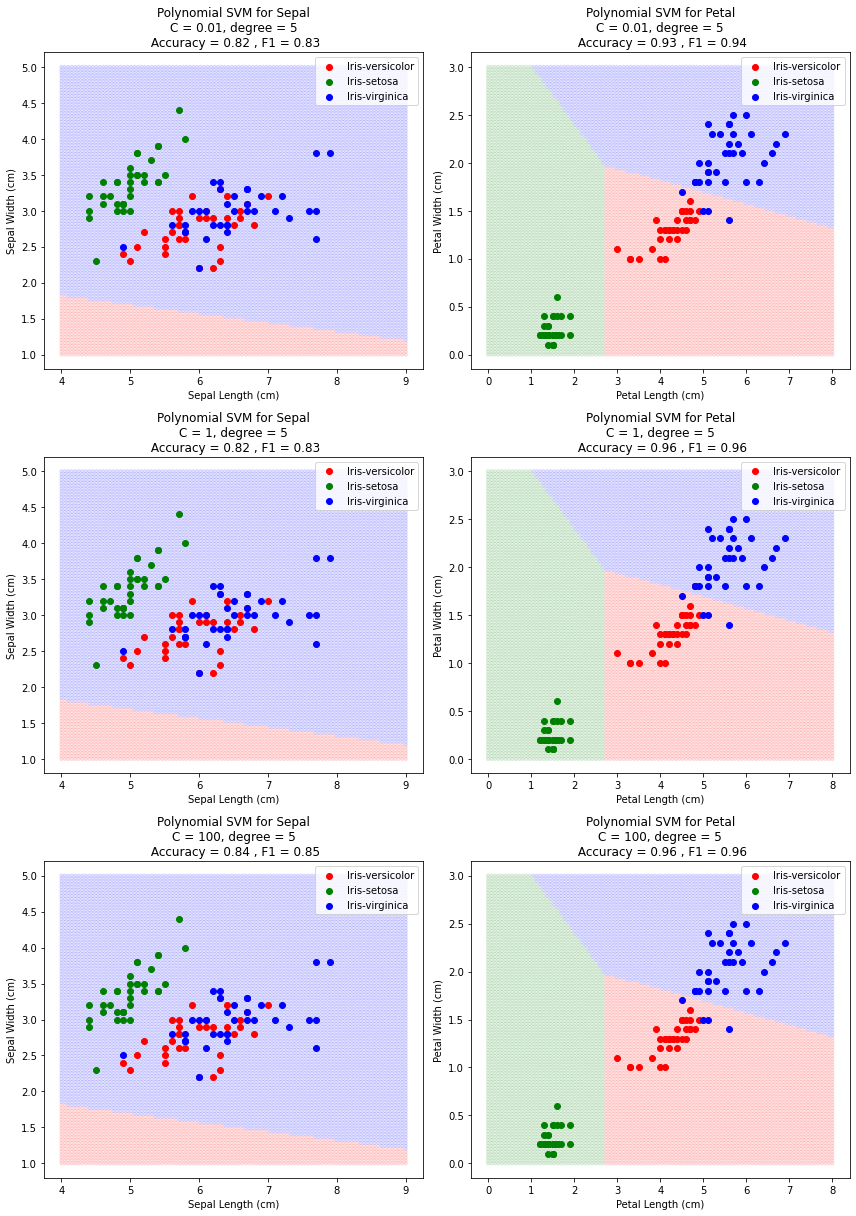

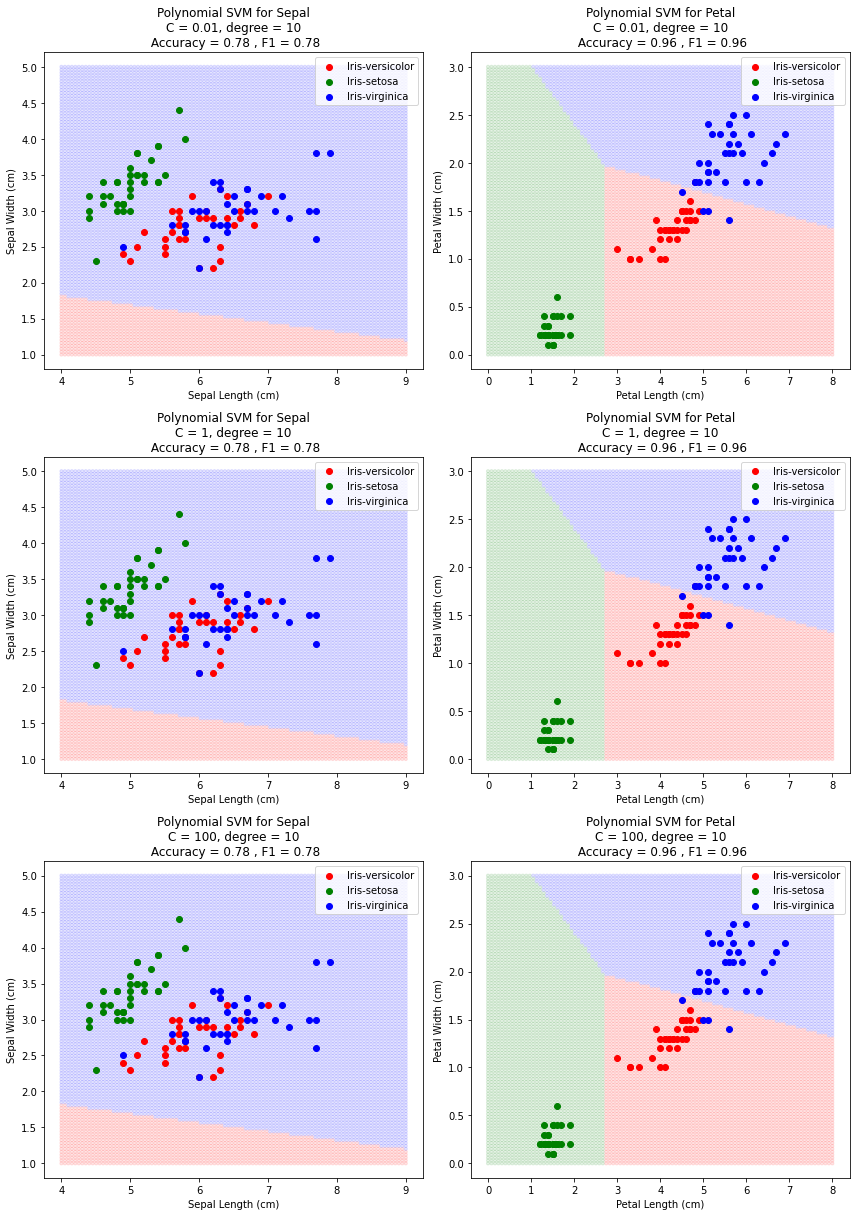

In [9]:
for degree_id, degree in enumerate([3,5,10]):

    fig, axs = plt.subplots(3,2)
    for feature_group_id, feature_group in enumerate(["Sepal", "Petal"]):

        for c_id, c in enumerate([0.01, 1, 100]):
            polynomial_svm = SVC(kernel="poly", C=c, degree=degree)    

            if feature_group == "Sepal":
                data_train_selected = data_train_sepal
                data_test_selected = data_test_sepal
                x_minim = 4
                x_maxim = 9
                y_minim = 1
                y_maxim = 5

            else:
                data_train_selected = data_train_petal
                data_test_selected = data_test_petal
                x_minim = 0
                x_maxim = 8
                y_minim = 0
                y_maxim = 3

            polynomial_svm.fit(data_train_selected.drop(columns=["class"]), data_train_selected["class"])

            # Plot Decision Boundry
            x_list = []
            y_list = []
            c_list = []
            xy_list = []

            for x in np.linspace(x_minim, x_maxim, 100):
                for y in np.linspace(y_minim, y_maxim, 100):
                    xy_list.append([x, y])
                    x_list.append(x)
                    y_list.append(y)

            for predict in linear_svm.predict(xy_list):
                if predict=="Iris-setosa":
                    c_list.append("green")
                elif predict=="Iris-versicolor":
                    c_list.append("red")
                elif predict=="Iris-virginica":
                    c_list.append("blue")

            axs[c_id, feature_group_id].scatter(x_list, y_list, color=c_list, alpha=0.1, s=10)

            # Plot Data
            class_data = []
            for class_name in class_names:
                class_data.append(data_train_selected[data_train_selected["class"]==class_name])    

            for i in range(len(class_names)):
                axs[c_id, feature_group_id].scatter(class_data[i][f"{feature_group} Length"].values
                                                    ,class_data[i][f"{feature_group} Width"].values
                                                    ,color=class_colors[i], label=class_names[i])
            
            # Evaluation metrics
            y_true = data_test_selected["class"].values
            y_pred = polynomial_svm.predict(data_test_selected.drop(columns = ["class"]))   
            
            accuracy = round(accuracy_score(y_true, y_pred), 2)
            f1 = round(f1_score(y_true, y_pred, average='macro'), 2)
            
            # Add titles and labels
            axs[c_id, feature_group_id].title.set_text(f"Polynomial SVM for {feature_group}\nC = {c}, degree = {degree}\n Accuracy = {accuracy} , F1 = {f1}")    
            axs[c_id, feature_group_id].legend()
            plt.setp(axs[c_id, feature_group_id], xlabel=f"{feature_group} Length (cm)", ylabel=f"{feature_group} Width (cm)")

    # Plot all!
    fig.set_size_inches(12,17)
    fig.tight_layout()
    plt.show()

# RBF Kernel

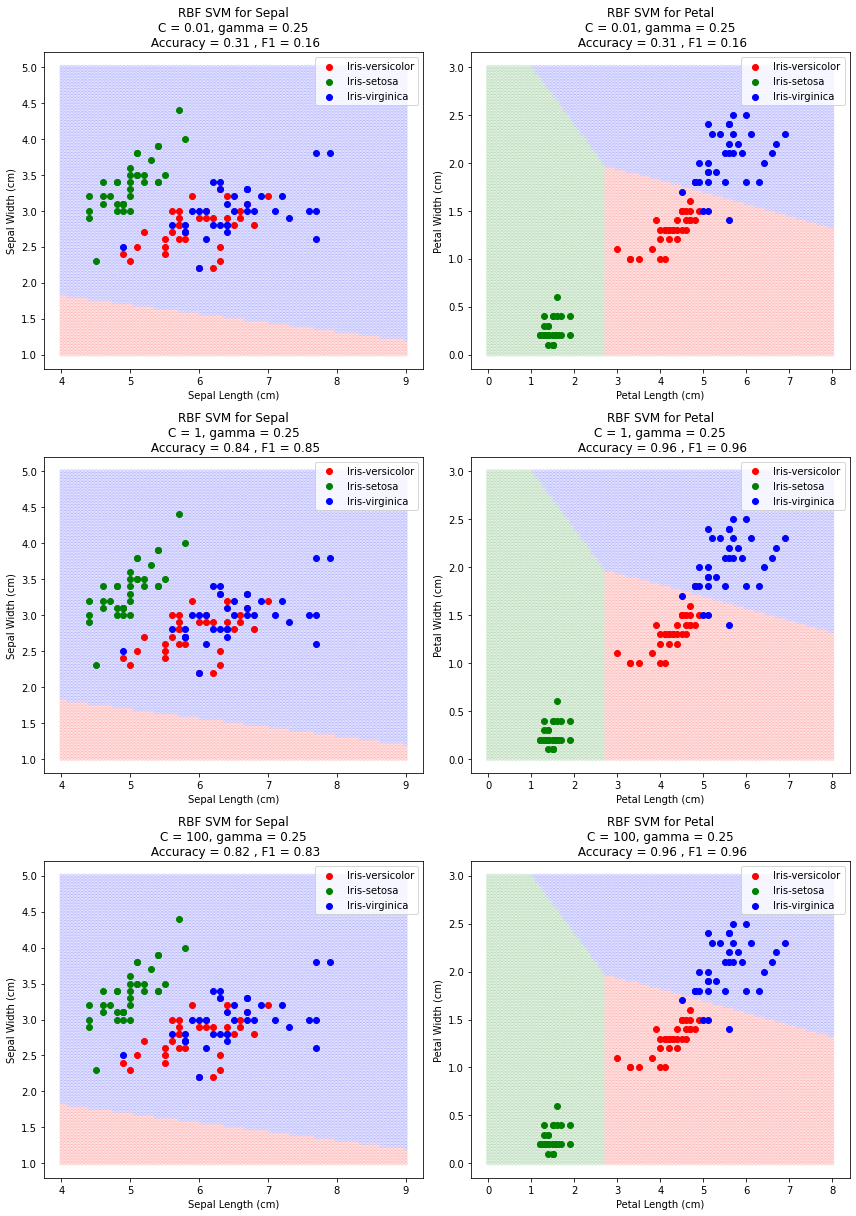

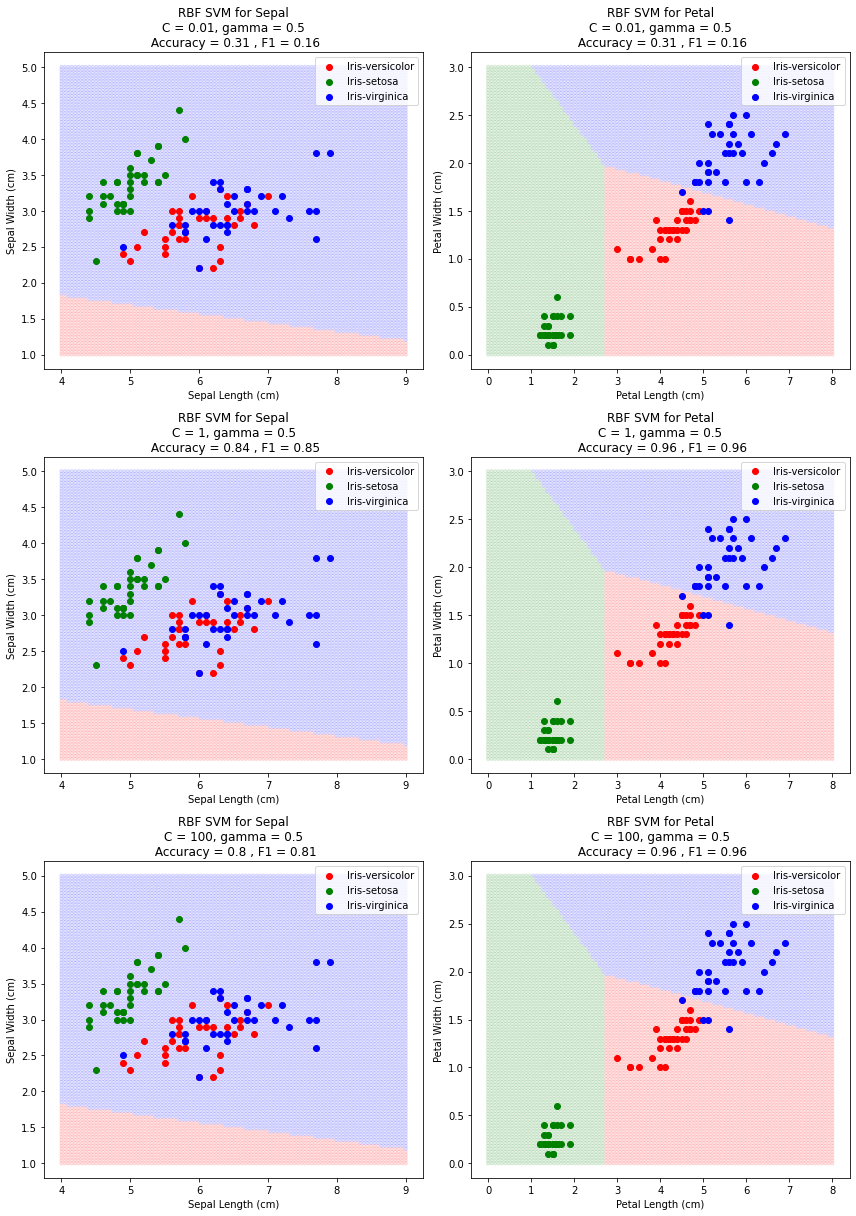

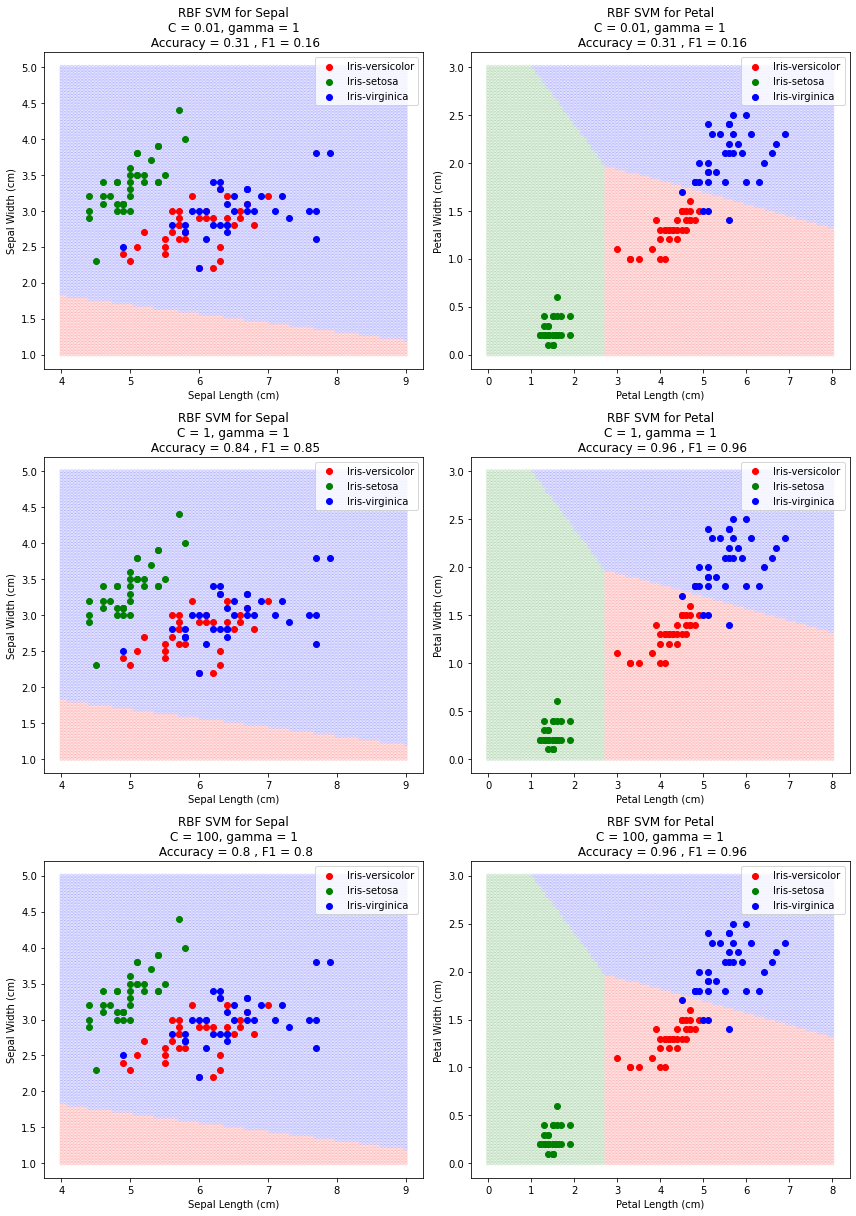

In [10]:
for gamma_id, gamma in enumerate([0.25,0.5,1]):

    fig, axs = plt.subplots(3,2)
    for feature_group_id, feature_group in enumerate(["Sepal", "Petal"]):

        for c_id, c in enumerate([0.01, 1, 100]):
            rbf_svm = SVC(kernel="rbf", C=c, gamma=gamma)    

            if feature_group == "Sepal":
                data_train_selected = data_train_sepal
                data_test_selected = data_test_sepal
                x_minim = 4
                x_maxim = 9
                y_minim = 1
                y_maxim = 5

            else:
                data_train_selected = data_train_petal
                data_test_selected = data_test_petal
                x_minim = 0
                x_maxim = 8
                y_minim = 0
                y_maxim = 3

            rbf_svm.fit(data_train_selected.drop(columns=["class"]), data_train_selected["class"])
        
            # Plot Decision Boundry
            x_list = []
            y_list = []
            c_list = []
            xy_list = []

            for x in np.linspace(x_minim, x_maxim, 100):
                for y in np.linspace(y_minim, y_maxim, 100):
                    xy_list.append([x, y])
                    x_list.append(x)
                    y_list.append(y)

            for predict in linear_svm.predict(xy_list):
                if predict=="Iris-setosa":
                    c_list.append("green")
                elif predict=="Iris-versicolor":
                    c_list.append("red")
                elif predict=="Iris-virginica":
                    c_list.append("blue")

            axs[c_id, feature_group_id].scatter(x_list, y_list, color=c_list, alpha=0.1, s=10)

            # Plot Data
            class_data = []
            for class_name in class_names:
                class_data.append(data_train_selected[data_train_selected["class"]==class_name])    

            for i in range(len(class_names)):
                axs[c_id, feature_group_id].scatter(class_data[i][f"{feature_group} Length"].values
                                                    ,class_data[i][f"{feature_group} Width"].values
                                                    ,color=class_colors[i], label=class_names[i])

            # Evaluation metrics
            y_true = data_test_selected["class"].values
            y_pred = rbf_svm.predict(data_test_selected.drop(columns = ["class"]))  
                
            accuracy = round(accuracy_score(y_true, y_pred), 2)
            f1 = round(f1_score(y_true, y_pred, average='macro'), 2)
            
            # Add titles and labels
            axs[c_id, feature_group_id].title.set_text(f"RBF SVM for {feature_group}\nC = {c}, gamma = {gamma}\n Accuracy = {accuracy} , F1 = {f1}")    
            axs[c_id, feature_group_id].legend()
            plt.setp(axs[c_id, feature_group_id], xlabel=f"{feature_group} Length (cm)", ylabel=f"{feature_group} Width (cm)")

    # Plot all!
    fig.set_size_inches(12,17)
    fig.tight_layout()
    plt.show()

# Sigmoid Kernel

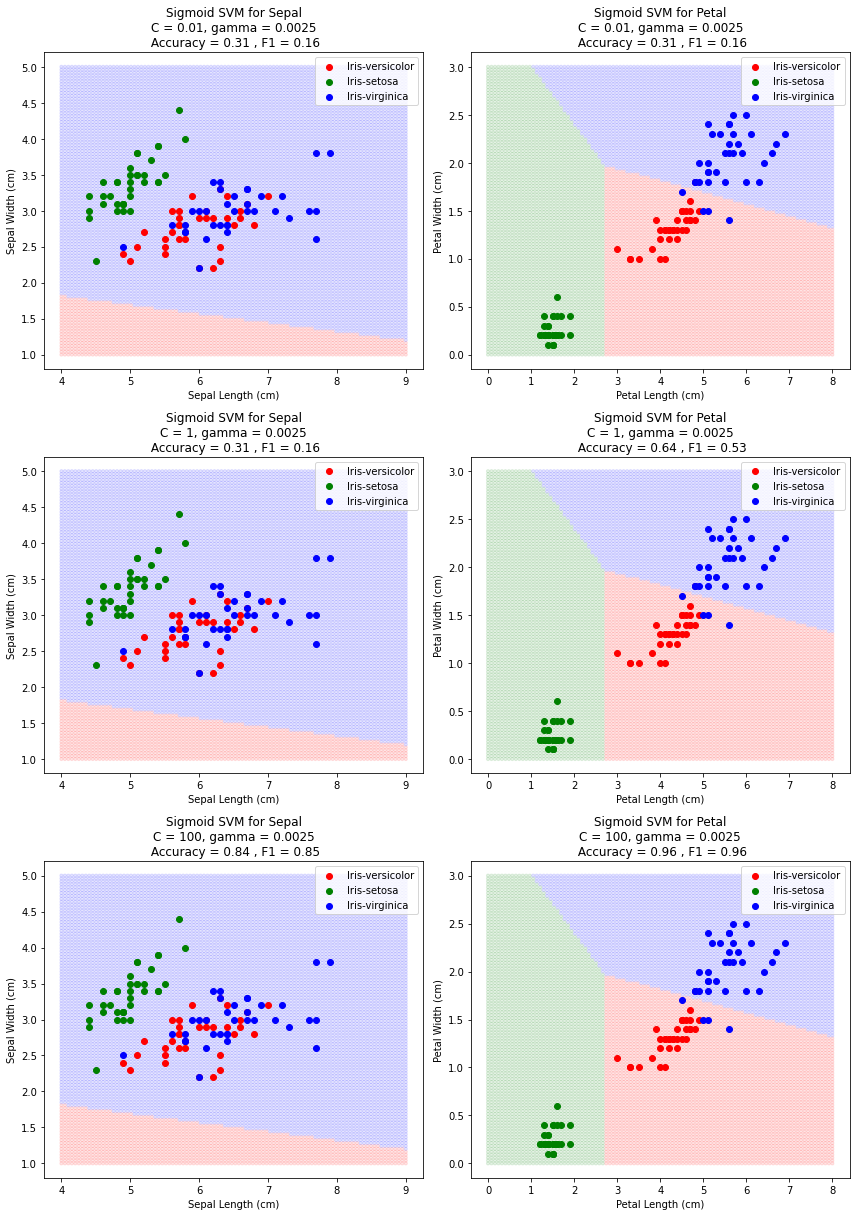

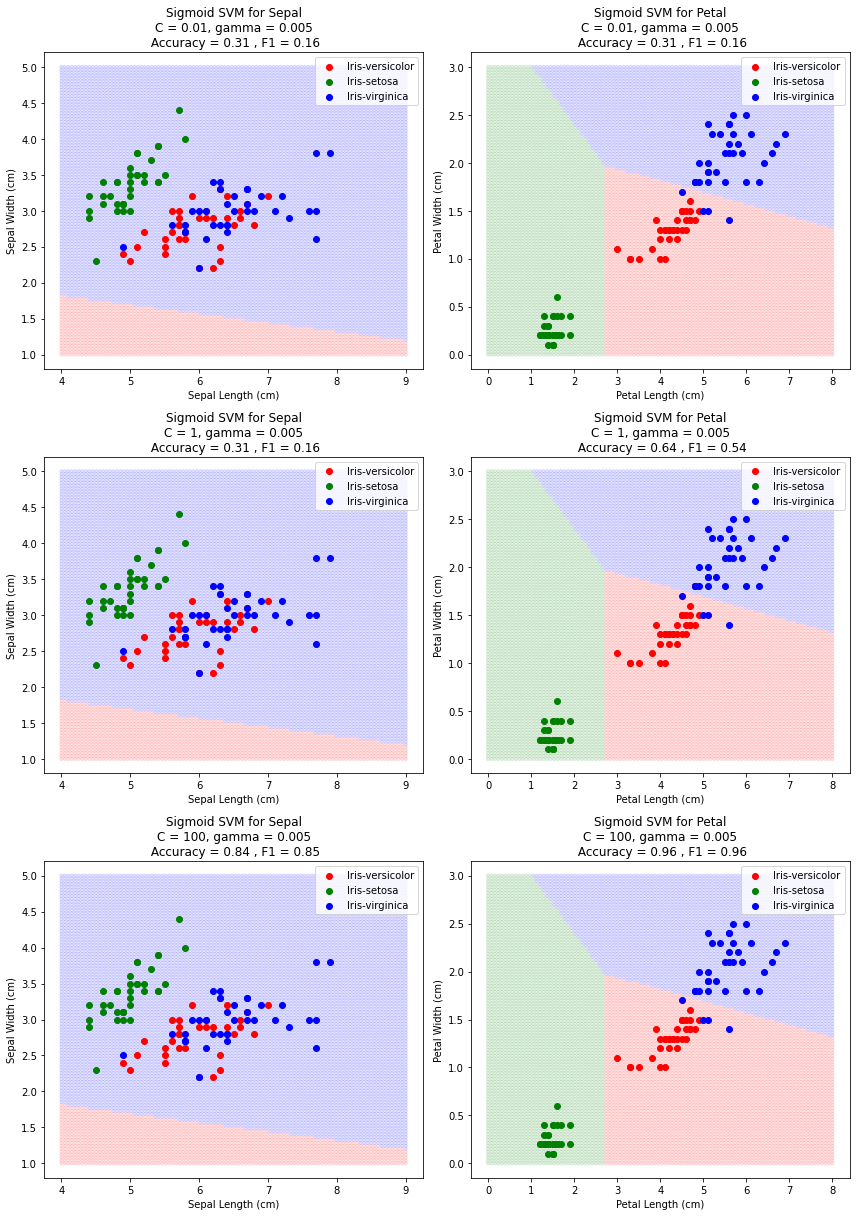

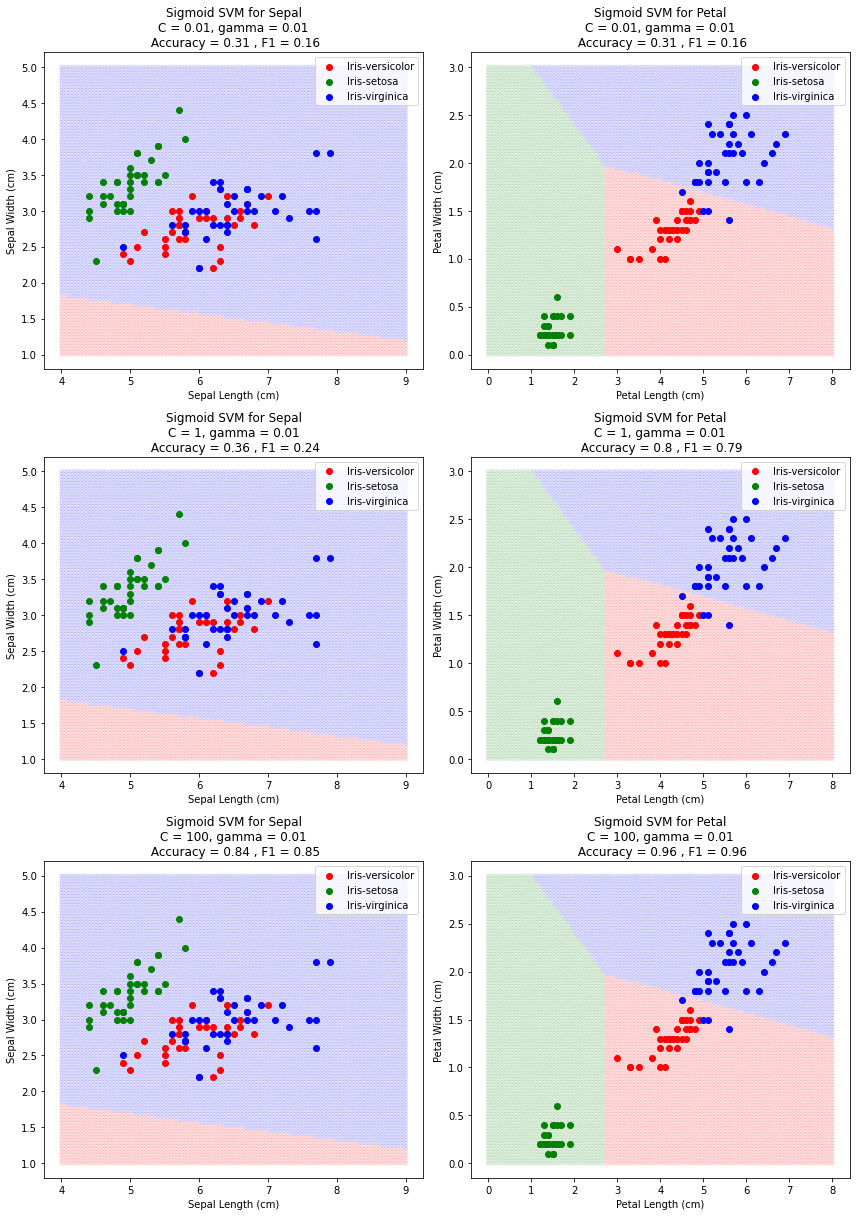

In [11]:
for gamma_id, gamma in enumerate([0.0025, 0.005, 0.01]):

    fig, axs = plt.subplots(3,2)
    for feature_group_id, feature_group in enumerate(["Sepal", "Petal"]):

        for c_id, c in enumerate([0.01, 1, 100]):
            sigmoid_svm = SVC(kernel="sigmoid", C=c, gamma=gamma)    

            if feature_group == "Sepal":
                data_train_selected = data_train_sepal
                data_test_selected = data_test_sepal
                x_minim = 4
                x_maxim = 9
                y_minim = 1
                y_maxim = 5

            else:
                data_train_selected = data_train_petal
                data_test_selected = data_test_petal
                x_minim = 0
                x_maxim = 8
                y_minim = 0
                y_maxim = 3

            sigmoid_svm.fit(data_train_selected.drop(columns=["class"]), data_train_selected["class"])

            # Plot Decision Boundry
            x_list = []
            y_list = []
            c_list = []
            xy_list = []

            for x in np.linspace(x_minim, x_maxim, 100):
                for y in np.linspace(y_minim, y_maxim, 100):
                    xy_list.append([x, y])
                    x_list.append(x)
                    y_list.append(y)

            for predict in linear_svm.predict(xy_list):
                if predict=="Iris-setosa":
                    c_list.append("green")
                elif predict=="Iris-versicolor":
                    c_list.append("red")
                elif predict=="Iris-virginica":
                    c_list.append("blue")

            axs[c_id, feature_group_id].scatter(x_list, y_list, color=c_list, alpha=0.1, s=10)

            # Plot Data
            class_data = []
            for class_name in class_names:
                class_data.append(data_train_selected[data_train_selected["class"]==class_name])    

            for i in range(len(class_names)):
                axs[c_id, feature_group_id].scatter(class_data[i][f"{feature_group} Length"].values
                                                    ,class_data[i][f"{feature_group} Width"].values
                                                    ,color=class_colors[i], label=class_names[i])
            
            # Evaluation metrics
            y_true = data_test_selected["class"].values
            y_pred = sigmoid_svm.predict(data_test_selected.drop(columns = ["class"]))  

            accuracy = round(accuracy_score(y_true, y_pred), 2)
            f1 = round(f1_score(y_true, y_pred, average='macro'), 2)

            # Add titles and labels
            axs[c_id, feature_group_id].title.set_text(f"Sigmoid SVM for {feature_group}\nC = {c}, gamma = {gamma}\n Accuracy = {accuracy} , F1 = {f1}")    
            axs[c_id, feature_group_id].legend()
            plt.setp(axs[c_id, feature_group_id], xlabel=f"{feature_group} Length (cm)", ylabel=f"{feature_group} Width (cm)")

    # Plot all!
    fig.set_size_inches(12,17)
    fig.tight_layout()
    plt.show()